In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


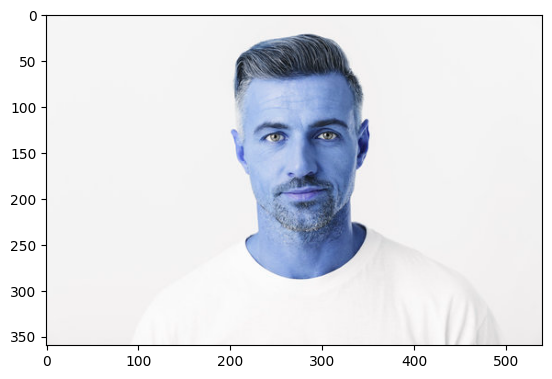

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/(SVM)ImageClassification/test_image/man.jpg')
plt.imshow(img)
plt.show()

In [3]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml -P /drive/gaze
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -P /drive/gaze

--2025-02-22 07:04:37--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘/drive/gaze/haarcascade_eye.xml’

haarcascade_eye.xml 100%[===================>] 333.40K  2.01MB/s    in 0.2s    

2025-02-22 07:04:38 (2.01 MB/s) - ‘/drive/gaze/haarcascade_eye.xml’ saved [341406/341406]

--2025-02-22 07:04:38--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected

In [4]:
import numpy as np
import sys

cascades_path = '/drive/gaze/'
face_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_eye.xml')

if face_cascade.empty():
    print("Error: Cannot load face cascade!")
if eye_cascade.empty():
    print("Error: Cannot load eye cascade!")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

print(faces)

[[200  71 157 157]]


[[31 44 36 36]
 [84 41 41 41]]


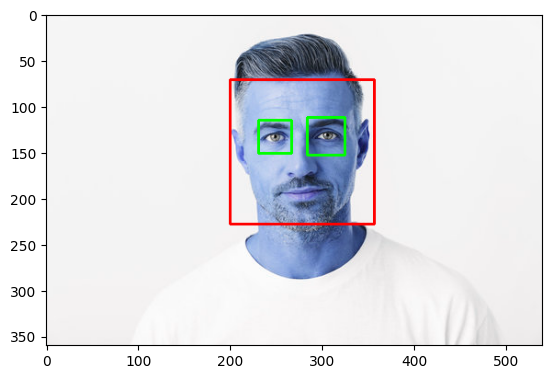

In [5]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    print(eyes)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    plt.imshow(img)

plt.imshow(img)
plt.show()

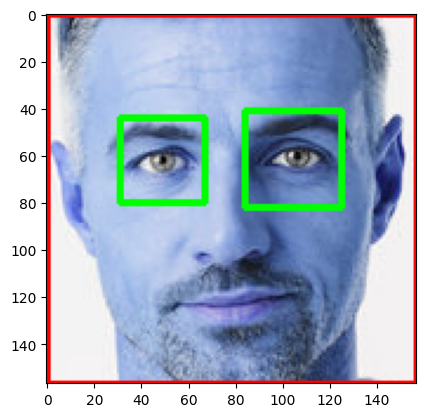

In [6]:
plt.imshow(roi_color)
plt.show()

In [7]:
import cv2

# Load pre-trained Haar cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

def get_cropped_image_if_has_2_eyes(image_path):
    cropped_faces = []

    img = cv2.imread(image_path)
    if img is None:
        print("Không thể đọc ảnh.")
        return []

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=6, minSize=(30, 30))

    if len(faces) == 0:
        print("Không phát hiện khuôn mặt.")
        return []
    elif len(faces) == 1:
        print("Nhận diện có 1 khuôn mặt.")
    else:
        print(f"Nhận diện có {len(faces)} khuôn mặt.")

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        # Eye detection
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) == 0:
            print("Khuôn mặt này không có mắt, bỏ qua.")
            continue  # Bỏ qua khuôn mặt này và kiểm tra khuôn mặt khác

        print("Nhận diện khuôn mặt này có mắt.")
        cropped_faces.append(roi_color)
        plt.imshow(roi_color)
        plt.show()

    return cropped_faces  # Trả về danh sách khuôn mặt đã cắt (có thể rỗng)


Nhận diện có 2 khuôn mặt.
Nhận diện khuôn mặt này có mắt.


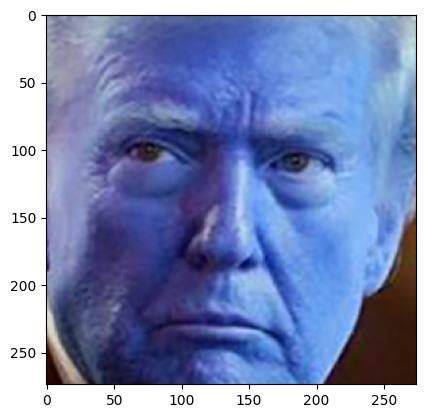

Khuôn mặt này không có mắt, bỏ qua.


In [8]:
test_img = get_cropped_image_if_has_2_eyes('/content/drive/MyDrive/(SVM)ImageClassification/test_image/trump.jpg')

Nhận diện có 1 khuôn mặt.
Nhận diện khuôn mặt này có mắt.


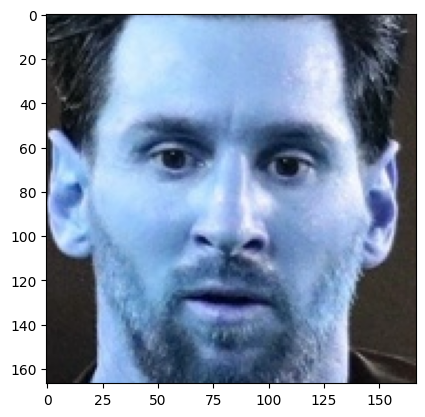

In [9]:
test_img = get_cropped_image_if_has_2_eyes('/content/drive/MyDrive/(SVM)ImageClassification/test_image/messi.jpg')

Nhận diện có 3 khuôn mặt.
Nhận diện khuôn mặt này có mắt.


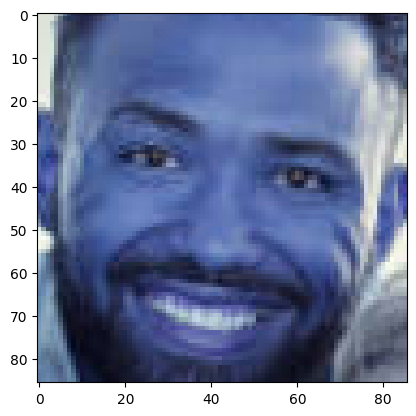

Nhận diện khuôn mặt này có mắt.


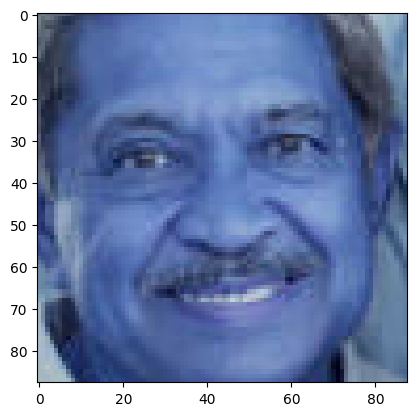

Nhận diện khuôn mặt này có mắt.


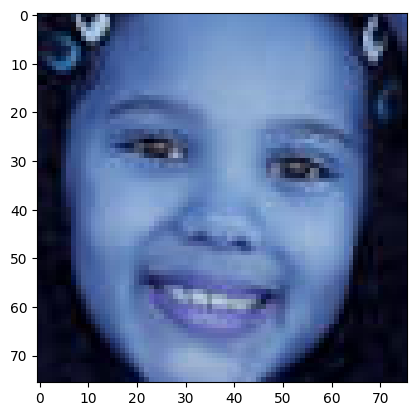

In [10]:
test_img = get_cropped_image_if_has_2_eyes('/content/drive/MyDrive/(SVM)ImageClassification/test_image/family.jpg')

In [11]:
!pip install pywavelets

import cv2
import numpy as np
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    # convert to gray
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    # convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    # compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    # process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    # reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.0 MB/s eta 0:00:00


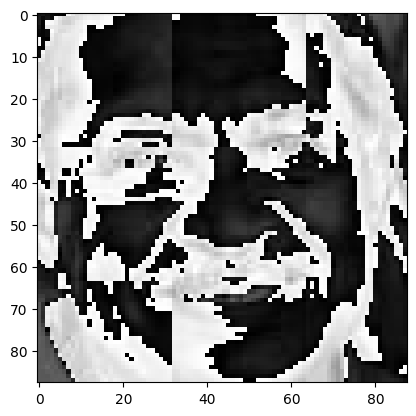

In [12]:
im_har = w2d(test_img[1], 'db1', 5)
plt.imshow(im_har, cmap='gray')
plt.show()